In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats
from augur.utils import json_to_tree
from collections import Counter

In [279]:
tree_file = '../../../nextstrain-build/phylogenetic_only_camels/auspice/mers.json'
#read in the tree
with open(tree_file, 'r') as f:
    tree_json = json.load(f)

#put tree in Bio.phylo format
tree = json_to_tree(tree_json)

In [280]:
muts_per_gene_clusters = {}
for node in tree.find_clades():
    muts = node.branch_attrs.get('mutations', {})
    for gene, mutations in muts.items():
        if gene == 'nuc':
                continue
        if gene not in muts_per_gene_clusters:
            muts_per_gene_clusters[gene] = {}
        for m in mutations:
            if m not in muts_per_gene_clusters[gene]:
                muts_per_gene_clusters[gene][m] = 1
            else:
                muts_per_gene_clusters[gene][m] += 1

print(muts_per_gene_clusters)


{'Hel': {'T236M': 1, 'E583D': 3, 'L467F': 1, 'M525I': 4, 'V57A': 1, 'A568T': 1, 'A454V': 1, 'A393V': 1, 'G469C': 1, 'A169V': 2, 'G469D': 1, 'G118C': 1, 'F133I': 1, 'N423S': 1, 'T593I': 1, 'A454T': 1, 'E261G': 1, 'K596N': 1, 'T529I': 3, 'S264R': 1, 'A150D': 1, 'E168A': 1, 'A237T': 1, 'E466V': 1, 'P238S': 1, 'K248T': 3, 'L43V': 2, 'S44C': 2, 'T115I': 1, 'A144V': 1, 'R345S': 1}, 'Nsp2': {'N388Y': 1, 'T395A': 3, 'L461F': 2, 'T456I': 3, 'S596F': 2, 'R656K': 1, 'N221S': 1, 'T646I': 3, 'T602N': 1, 'L581M': 1, 'L117X': 1, 'N348D': 1, 'L131F': 1, 'D586R': 1, 'D151E': 1, 'L304I': 1, 'D315E': 1, 'A339V': 2, 'T452I': 1, 'V527I': 1, 'A430T': 1, 'T432I': 1, 'A168T': 1, 'H61Y': 2, 'T472I': 2, 'T171I': 1, 'D27G': 1, 'T449I': 3, 'F94L': 1, 'I382T': 1, 'S226F': 1, 'T464I': 2, 'R632C': 2, 'Y396C': 1, 'V595L': 1, 'D114N': 1, 'R260T': 1, 'V505F': 1, 'G413S': 1, 'V499L': 1, 'S575F': 1, 'Y388N': 2, 'T443I': 3, 'R488N': 1, 'T590I': 1, 'A37V': 1, 'K52N': 1, 'F475I': 1, 'E636K': 1, 'T192N': 1, 'K391R': 1, 'D565

In [281]:
all_mutation_counts = []
s1_mutation_counts = []
orf3_mutation_counts = []
orf4b_mutation_counts = []

for gene, mutations in muts_per_gene_clusters.items():
    for mutation, count in mutations.items():
        all_mutation_counts.append(count)
    if gene == 'S1':
        for mutation, count in mutations.items():
            s1_mutation_counts.append(count)
    elif gene == 'Orf3':
        for mutation, count in mutations.items():
            orf3_mutation_counts.append(count)
    elif gene == 'Orf4b':
        for mutation, count in mutations.items():
            orf4b_mutation_counts.append(count) 

print(s1_mutation_counts)

[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 2, 1, 1, 1, 1, 10, 1, 1, 3, 3, 1, 4, 1, 1, 3, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 5, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1]


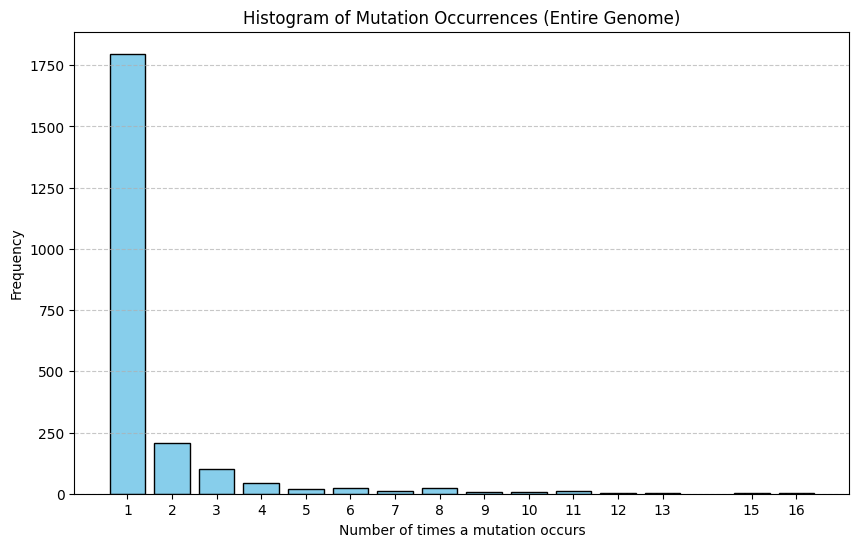

In [282]:
count_histogram = Counter(all_mutation_counts)

counts = list(count_histogram.keys())
frequencies = list(count_histogram.values())

plt.figure(figsize=(10, 6))
plt.bar(counts, frequencies, width=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Number of times a mutation occurs')
plt.ylabel('Frequency')
plt.title('Histogram of Mutation Occurrences (Entire Genome)')
plt.xticks(counts)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

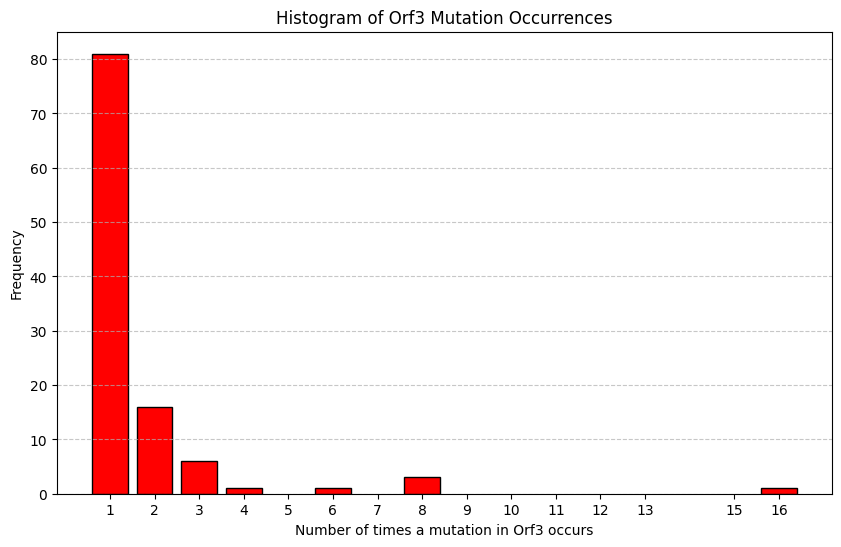

In [283]:
orf3_count_histogram = Counter(orf3_mutation_counts)


orf3_counts = list(orf3_count_histogram.keys())

orf3_frequencies = list(orf3_count_histogram.values())

plt.figure(figsize=(10, 6))
plt.bar(orf3_counts, orf3_frequencies, width=0.8, color='red', edgecolor='black')
plt.xlabel('Number of times a mutation in Orf3 occurs')
plt.ylabel('Frequency')
plt.title('Histogram of Orf3 Mutation Occurrences')
plt.xticks(counts)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

[1, 3, 2, 5, 10, 4, 6]
[76, 9, 14, 3, 1, 3, 2]


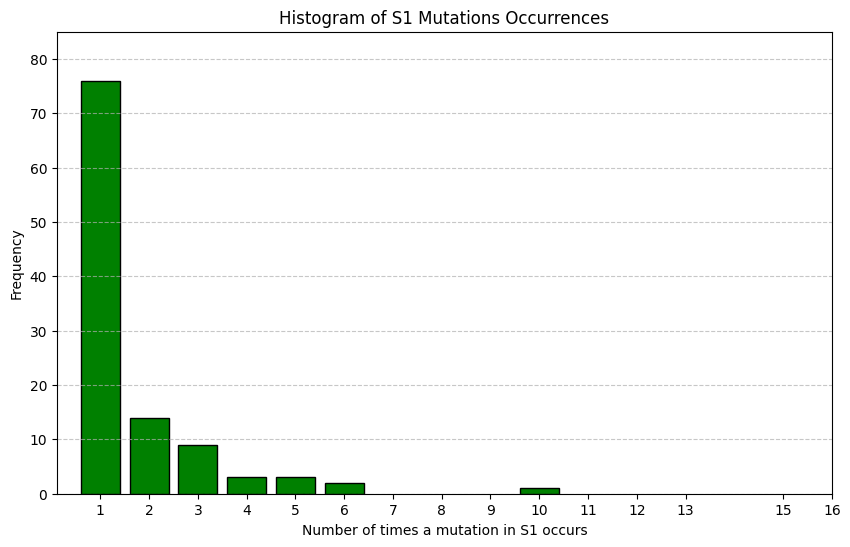

In [288]:
s1_count_histogram = Counter(s1_mutation_counts)

s1_counts = list(s1_count_histogram.keys())
s1_frequencies = list(s1_count_histogram.values())

print(s1_counts)
print(s1_frequencies)
plt.figure(figsize=(10, 6))
plt.bar(s1_counts, s1_frequencies, width=0.8, color='green', edgecolor='black')
plt.xlabel('Number of times a mutation in S1 occurs')
plt.ylabel('Frequency')
plt.title('Histogram of S1 Mutations Occurrences')
plt.xticks(counts)  
plt.ylim(0, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

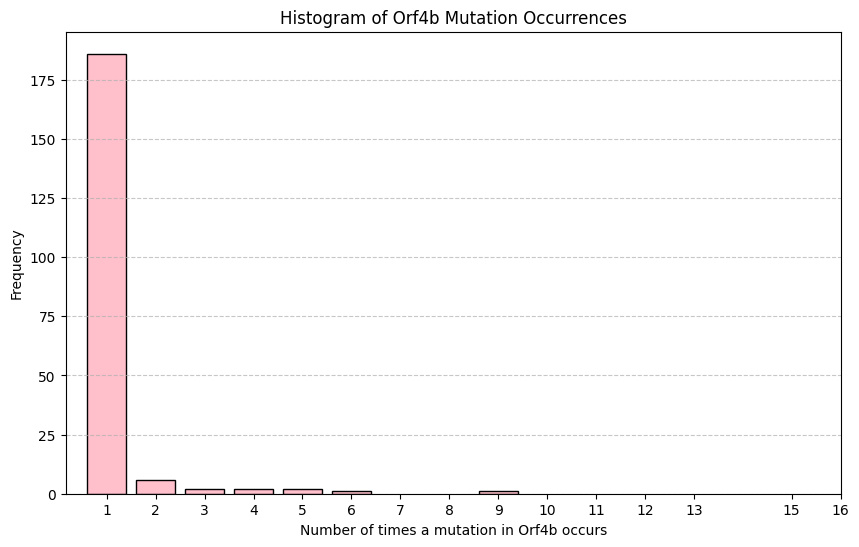

In [285]:
orf4b_count_histogram = Counter(orf4b_mutation_counts)

orf4b_counts = list(orf4b_count_histogram.keys())
orf4b_frequencies = list(orf4b_count_histogram.values())

plt.figure(figsize=(10, 6))
plt.bar(orf4b_counts, orf4b_frequencies, width=0.8, color='pink', edgecolor='black')
plt.xlabel('Number of times a mutation in Orf4b occurs')
plt.ylabel('Frequency')
plt.title('Histogram of Orf4b Mutation Occurrences')
plt.xticks(counts)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [286]:
#s1 vs. orf 3
s1_extended_frequencies = [76, 14, 9, 3, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
orf3_extended_frequencies = [81, 16, 6, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
chi2, chi_p_value = stats.chisquare(f_obs=orf3_extended_frequencies, f_exp=s1_extended_frequencies)
print(chi_p_value)

ks_statistic, ks_p_value = stats.ks_2samp(s1_mutation_counts, orf3_mutation_counts)
print(ks_p_value)

nan
0.9890045283786371


c:\Users\sartz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7985: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
c:\Users\sartz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7985: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
